# Practical 3: Artificial Neural Network

This is the first task of Practical 3. You will build a neural network to classify the handwritten digits from the MNIST dataset (http://yann.lecun.com/exdb/mnist/). 
You will build the classifier from scartch. 

We will mark your code based on the accuracy of your model. You should get **at least 97%** accuracy on this dataset. Don't forget to save and check in your model. 

## Import the libraries

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import to_categorical

import tensorflow as tf
from tensorflow import keras

In [63]:
tf.__version__

'2.4.0'

In [64]:
tf.keras.__version__

'2.4.0'

## Prepare the dataset

In this block, you will prepare the data for the training, such as normalisation. 

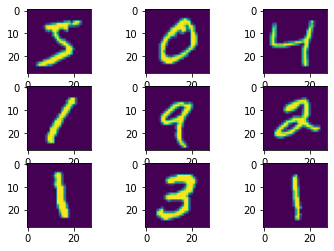

Before reshape...
X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)
After reshape...
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


In [65]:
from keras.datasets import mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

for i in range(0,9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train_full[i])
plt.show()

print("Before reshape...")
print("X_train shape: " + str(X_train_full.shape))
print("X_test shape: " + str(X_test.shape))
print("y_train shape: " + str(y_train_full.shape))
print("y_test shape: " + str(y_test.shape))

print("After reshape...")
# We reshape the data here so that it has proper dimensions i.e one channel
X_train = X_train_full.reshape((X_train_full.shape[0], X_train_full.shape[1], X_train_full.shape[2], 1)) #60000x28x28x1
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)) #10000x28x28x1
print("X_train shape: " + str(X_train.shape))
print("X_test shape: " + str(X_test.shape))

# We use one-hot encoding here for the labels
y_train = to_categorical(y_train_full)
y_test = to_categorical(y_test)

# Normalize Data

In [66]:
X_train =X_train.astype('float32')
X_test = X_test.astype('float32')
X_train=X_train/255
X_test=X_test/255

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, train_size=0.7)

print("After splitting...")
print("X_train shape: " + str(X_train.shape))
print("X_valid shape: " + str(X_valid.shape))
print("X_test shape: " + str(X_test.shape))

After splitting...
X_train shape: (42000, 28, 28, 1)
X_valid shape: (18000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


## Build and train the model

Build and train your model. 

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam, SGD

In [54]:
input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])
def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(BatchNormalization()) 
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.25))
    model.add(BatchNormalization()) 
    model.add(Dense(10, activation='softmax'))
    opt = opt = Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [55]:
model=build_model()

In [56]:
# show the structure of your model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)             

In [57]:
batch_size = 32
num_epoch = 10
#We keep the training history
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/10
1313/1313 [==============================] - 9s 6ms/step - loss: 0.6892 - accuracy: 0.7811 - val_loss: 0.0661 - val_accuracy: 0.9800
Epoch 2/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.1272 - accuracy: 0.9630 - val_loss: 0.0511 - val_accuracy: 0.9840
Epoch 3/10
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0995 - accuracy: 0.9718 - val_loss: 0.0538 - val_accuracy: 0.9836
Epoch 4/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0833 - accuracy: 0.9764 - val_loss: 0.0462 - val_accuracy: 0.9863
Epoch 5/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0759 - accuracy: 0.9766 - val_loss: 0.0428 - val_accuracy: 0.9882
Epoch 6/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0712 - accuracy: 0.9781 - val_loss: 0.0383 - val_accuracy: 0.9891
Epoch 7/10
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0625 - accuracy: 0.9820 - val_loss: 0.0340 - val_accuracy:

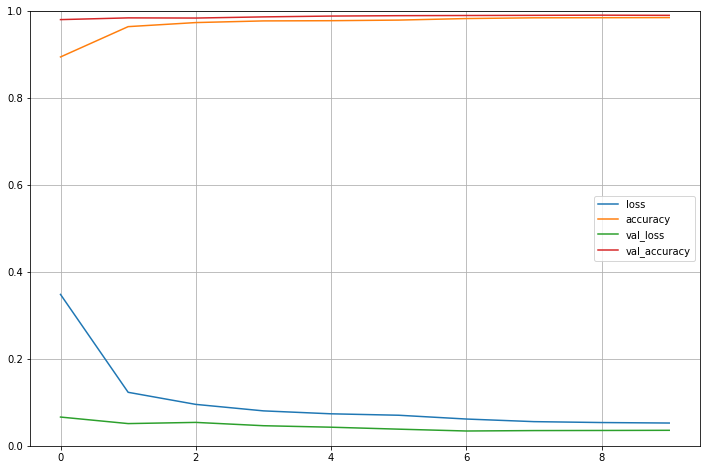

In [58]:
# Assume you have stored the training history in the variable "history"
# Show the learning curves
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

## Save the model

In [59]:
model.save('mnist.h5') 

## Load the model and evaluate it on the test data

In [60]:
model = keras.models.load_model("mnist.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0262 - accuracy: 0.9920


[0.026190951466560364, 0.9919999837875366]

## Short report

Please write briefly how you build and train the model. Please include the decisions you made, such as why you use x number layers, and the difficulties you met.

The Practical 3 was completed by the following student(s): Barış Özakar

# Preparation of data
For this practical we are using the MNIST dataset, which contains handwritten digits 0-9. Therefore, our labels are categorical. After doing the appropriate reshapings, we normalized our data by dividing the pixel values with 255. In order to appropriately decide on the hyperparameters and do training with validation, we split our dataset into training, validation and test sets containing up 42000, 18000, 10000 images respectively. 


# Building the model
Our Convolutional Neural Network consists of two convolution layers of 32 and 62 (3x3) filters with max-pooling and dropout layers in between. The fully connected layers consists of two Dense layers of 128, 64 and 10 neurons with batch normalization and dropout(0.25) layers in between. We have added batch normalization and dropout layers in order to overcome overfitting because without them, we were faced with a case of overfitting where our model was not able to generalize well. We have tried many combinations of layer numbers, but empirically, this combination yielded the best accuracy in the validation and test sets.

# Training
Since our data is categorical, we have used the categorical cross entropy loss function. In terms of optimizers, we have experimented with SGD and Adam optimizers, however we finally empirically decided on Adam as it converged faster with a learning rate of 0.001. We have tried other learning rate values (0.01 and 0.0001) however, learning rate of 0.001 had the best convergence properties. We used a batch size of 32 with 10 epochs and our training and validation set accuracies were %98.58 and %98.98 respectively. Upon testing our model on the test set, we have achieved an accuracy of 99.20%, which is above the benchmark expectations of 97%.

# Difficulties
Long training times and getting the accuracy over 97% was among the main difficulties that we faced. In order to solve long training times, we have decided to use Google Colab by running on the GPU so that training was faster. Getting the accuracy over 97% took empirical observations and changes to our model and our hyperparameters (addition of dropout and batchnormalization layers, determining a learning rate that is suitable, adding the right amount of convolution layers/filters and dense layers/neurons to allow for successful decision making).